In [1]:
from google.colab import files
uploaded = files.upload()  # This will open a file picker to upload files.


Saving Ramamurthy Nagar.csv to Ramamurthy Nagar.csv
Saving Banashankari.csv to Banashankari.csv
Saving Bellandur.csv to Bellandur.csv
Saving Bilekahalli.csv to Bilekahalli.csv
Saving BTM 2nd Stage.csv to BTM 2nd Stage.csv
Saving Chikkalasandra.csv to Chikkalasandra.csv
Saving Electronic City.csv to Electronic City.csv
Saving Gottigere.csv to Gottigere.csv
Saving Hebbal.csv to Hebbal.csv
Saving Hulimavu.csv to Hulimavu.csv
Saving Indiranagar.csv to Indiranagar.csv
Saving Jayanagar.csv to Jayanagar.csv
Saving JP Nagar.csv to JP Nagar.csv
Saving Krishnarajapura.csv to Krishnarajapura.csv
Saving Kumaraswamy Layout.csv to Kumaraswamy Layout.csv
Saving Mahadevapura.csv to Mahadevapura.csv
Saving Marathahalli.csv to Marathahalli.csv
Saving Nagarbhavi.csv to Nagarbhavi.csv
Saving Rajaji Nagar.csv to Rajaji Nagar.csv
Saving RR Nagar.csv to RR Nagar.csv
Saving RT Nagar.csv to RT Nagar.csv
Saving Vijaya Nagar.csv to Vijaya Nagar.csv
Saving Whitefield.csv to Whitefield.csv
Saving Yelahanka.csv to 

In [2]:
import glob
file_paths = glob.glob("*.csv")  # This will list all CSV files in the current directory.


In [8]:
import pandas as pd
import glob

# Load all CSV files
file_paths = glob.glob("datasets/*.csv")

# Initialize an empty list to hold dataframes
dataframes = []

# Read each CSV and append it to the list
for file_path in file_paths:
    try:
        df = pd.read_csv(file_path, encoding='latin1')  # or 'iso-8859-1', 'cp1252'
        dataframes.append(df)
    except UnicodeDecodeError:
        print(f"Error reading {file_path}. Trying a different encoding.")
        df = pd.read_csv(file_path, encoding='iso-8859-1')
        dataframes.append(df)

# Concatenate all dataframes
final_df = pd.concat(dataframes, ignore_index=True)

# Perform data cleaning (examples shown below)
final_df['activation_date'] = pd.to_datetime(final_df['activation_date'],dayfirst=True, errors='coerce')
final_df['bathroom'] = final_df['bathroom'].fillna(0).astype(int)
# Additional cleaning steps...

# Save the cleaned and merged dataframe
final_df.to_csv("final_property_data.csv", index=False)


In [4]:
file_paths = glob.glob("datasets/*.csv")
print(file_paths)

['datasets/Bommanahalli.csv', 'datasets/Hongasandra.csv', 'datasets/Krishnarajapura.csv', 'datasets/Thanisandra.csv', 'datasets/Konanakunte.csv', 'datasets/Varthur.csv', 'datasets/Mathikere.csv', 'datasets/Nagarbhavi.csv', 'datasets/Vijaya Nagar.csv', 'datasets/Akshayanagar.csv', 'datasets/Hoodi.csv', 'datasets/Mahadevapura.csv', 'datasets/Yelahanka.csv', 'datasets/HBR Layout.csv', 'datasets/Electronics City Phase 1.csv', 'datasets/Kumaraswamy Layout.csv', 'datasets/Munnekollal.csv', 'datasets/Basavanagudi.csv', 'datasets/Padmanabhanagar.csv', 'datasets/Hosakerehalli.csv', 'datasets/K.R Puram.csv', 'datasets/Indiranagar.csv', 'datasets/Kengeri Satellite Town.csv', 'datasets/Gottigere.csv', 'datasets/Hulimavu.csv', 'datasets/Singasandra.csv', 'datasets/Rajaji Nagar.csv', 'datasets/Sunkadakatte.csv', 'datasets/Subramanyapura.csv', 'datasets/RT Nagar.csv', 'datasets/Bilekahalli.csv', 'datasets/Kadugodi.csv', 'datasets/Arekere.csv', 'datasets/Ejipura.csv', 'datasets/Jayanagar.csv', 'datase

In [14]:
df = pd.read_csv('final_property_data.csv')

# Print the column names
# print(df.columns)


import pandas as pd
import json


# Check if 'gym' column exists, then fill missing values
if 'gym' in df.columns:
    df['gym'] = df['gym'].fillna(0)

# Check if 'lift' column exists, then fill missing values
if 'lift' in df.columns:
    df['lift'] = df['lift'].fillna(0)

# Standardize date format
if 'activation_date' in df.columns:
    df['activation_date'] = pd.to_datetime(df['activation_date'])

# Convert numeric columns, handle NaN values by filling before conversion
if 'bathroom' in df.columns:
    df['bathroom'] = df['bathroom'].fillna(0).astype(int)

if 'floor' in df.columns:
    df['floor'] = df['floor'].fillna(0).astype(int)

# Handle corrupted JSON-like strings in photo_urls
def clean_photo_urls(photo_url):
    try:
        photo_list = json.loads(photo_url.replace("'", "\""))
        return len(photo_list)
    except:
        return 0

# Check if 'photo_urls' exists
if 'photo_urls' in df.columns:
    df['photo_count'] = df['photo_urls'].apply(clean_photo_urls)

# Remove duplicates based on 'property_id'
if 'property_id' in df.columns:
    df = df.drop_duplicates(subset='property_id')

# Handle outliers by capping rent values
if 'rent' in df.columns:
    df['rent'] = df['rent'].clip(lower=500, upper=100000)

# Standardize categorical values in 'type' column
if 'type' in df.columns:
    df['type'] = df['type'].str.lower()

# Clean string columns (e.g., 'locality')
if 'locality' in df.columns:
    df['locality'] = df['locality'].str.strip().str.title()



In [32]:

import json
import re

# Step 1: Load the data from the TSV file
df = pd.read_csv('property_photos.tsv', sep='\t')

# Step 2: Function to clean the 'photo_urls' and count the photos
def count_photos(photo_urls):
    if pd.isna(photo_urls) or photo_urls == 'NULL':
        return 0  # If no photos, return 0

    try:
        # Remove any escape characters (like \) that may be present due to the corrupted JSON
        cleaned_photo_urls = re.sub(r'\\([":,{}\[\]])', r'\1', photo_urls)  # Clean the escaped characters

        # Now, parse the JSON string
        photos = json.loads(cleaned_photo_urls)

        # Return the number of photos
        return len(photos)
    except json.JSONDecodeError:
        # In case of a JSON decode error, return 0
        return 0

# Step 3: Apply the function to the 'photo_urls' column
df['photo_count'] = df['photo_urls'].apply(count_photos)

# Step 4: Verify the cleaned data
print(df[['property_id', 'photo_count']].head())  # Display a sample of the cleaned data

# Step 5: Save the cleaned dataset to a new file
df.to_csv('cleaned_property_photos.csv', index=False)


                        property_id  photo_count
0  ff808081469fd6e20146a5af948000ea            0
1  ff8080814702d3d10147068359d200cd            0
2  ff808081470c645401470fb03f5800a6            0
3  ff808081470c6454014715eaa5960281            0
4  ff808081474aa867014771a0298f0aa6            0


In [42]:
import pandas as pd

# Load the property photos data (adjust the path and filename as needed)
property_photos = pd.read_csv('property_photos.tsv', sep='\t')

# Now check if the 'photo_urls' column exists
print(property_photos.columns)  # List the column names


# Check if the column exists in the dataframe
if 'photo_urls' in property_photos.columns:
    def count_photos(photo_urls):
        if pd.isna(photo_urls):
            return 0
        try:
            # Try to load the photo URLs as JSON
            urls = json.loads(photo_urls)  # Assuming it's a list of URLs in a JSON string format
            return len(urls)  # Count the number of photo URLs
        except json.JSONDecodeError:
            return 0  # Return 0 if the string is corrupted

    # Apply the function to create the 'photo_count' column
    property_photos['photo_count'] = property_photos['photo_urls'].apply(count_photos)

else:
    print("The 'photo_urls' column is missing or incorrectly named in final_df.")


Index(['property_id', 'photo_urls'], dtype='object')


In [40]:
import pandas as pd

# Load the property photos data (adjust the path and filename as needed)
property_photos = pd.read_csv('property_photos.tsv', sep='\t')

# Now check if the 'photo_urls' column exists
print(property_photos.columns)  # List the column names


Index(['property_id', 'photo_urls'], dtype='object')


In [35]:
print(final_df.columns)  # Check the column names of the final_df dataframe


Index(['property_id', 'type', 'activation_date', 'bathroom', 'floor',
       'total_floor', 'furnishing', 'gym', 'latitude', 'longitude',
       'lease_type', 'lift', 'location', 'parking', 'property_age',
       'property_size', 'swimming_pool', 'pin_code', 'rent', 'deposit',
       'building_type', 'locality',
       'property_id/type/activation_date/bathroom/floor/total_floor/furnishing/gym/latitude/longitude/lease_type/lift/locality/parking/property_age/property_size/swimming_pool/pin_code/rent/deposit/building_type',
       'ÿþ'],
      dtype='object')


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


final_df = pd.read_csv('final_property_data.csv')

# 6. Final shape of the combined property data after merging all location CSV files.
print(final_df.shape)  # Output will be in the format (rows, columns)

(14532, 24)


In [44]:
# 7. Percentage of properties located in HSR Layout
hsr_count = final_df[final_df['locality'] == 'HSR Layout'].shape[0]
hsr_percentage = (hsr_count / final_df.shape[0]) * 100
print(round(hsr_percentage))

0


In [46]:
# 8. Number of unique locations
unique_locations = final_df['locality'].nunique()
print(unique_locations)



61


In [47]:
# 8. Number of unique locations
unique_locations = final_df['locality'].nunique()
print(unique_locations)

# 9. Locality with the highest average rent
avg_rent_by_locality = final_df.groupby('locality')['rent'].mean()
highest_rent_locality = avg_rent_by_locality.idxmax()
print(highest_rent_locality)

61
Bellandur


In [49]:
# 10. Feature with the highest correlation with rent

# Select only numeric columns from final_df
numeric_columns = final_df.select_dtypes(include=[np.number])

# Compute correlations only for numeric columns
correlation = numeric_columns.corr()

# Get the feature with the highest correlation with 'rent'
highest_corr_feature = correlation['rent'].idxmax()

print(f"The feature with the highest correlation with rent is: {highest_corr_feature}")


The feature with the highest correlation with rent is: rent


In [51]:
# Ensure 'activation_date' is in datetime format
final_df['activation_date'] = pd.to_datetime(final_df['activation_date'], errors='coerce')

# Check if there is a column 'property_id' and 'activation_date'
if 'property_id' in final_df.columns and 'activation_date' in final_df.columns:
    # Calculate interaction count for each property
    final_df['interaction_count'] = final_df.groupby('property_id')['property_id'].transform('size')

    # Calculate days since activation
    final_df['days_since_activation'] = (pd.to_datetime('today') - final_df['activation_date']).dt.days

    # Filter properties within 7 days of activation
    recent_interactions = final_df[final_df['days_since_activation'] <= 7]

    # Check if there are any properties in the filtered data
    if not recent_interactions.empty:
        majority_interactions = recent_interactions['interaction_count'].mode()

        # Ensure that mode() has a valid result
        if not majority_interactions.empty:
            print(f"Majority of properties within 7 days of activation have {majority_interactions.iloc[0]} interactions.")
        else:
            print("No mode found for interactions within 7 days.")
    else:
        print("No properties activated within the last 7 days.")
else:
    print("Missing 'property_id' or 'activation_date' columns in the dataset.")


# 12. Create property_age_category feature and identify the most frequent category
def categorize_age(age):
    if age <= 1:
        return 'New'
    elif 1 < age <= 5:
        return 'Less than 5 years'
    elif 5 < age <= 10:
        return '5 to 10 years'
    elif 10 < age <= 20:
        return '10 to 20 years'
    else:
        return 'More than 20 years'

final_df['property_age_category'] = final_df['property_age'].apply(categorize_age)
most_frequent_category = final_df['property_age_category'].mode()[0]
print(most_frequent_category)

No properties activated within the last 7 days.
New


In [54]:
# 13. Apartment type with the highest average interactions
# Assuming that type refers to BHK categories in the 'type' column
avg_interactions_by_type = final_df.groupby('type')['interaction_count'].mean()
highest_avg_interactions_type = avg_interactions_by_type.idxmax()
print(highest_avg_interactions_type)



BHK1


In [56]:
# 14. Amenity with the greatest impact on rent
# Let's check the correlation of amenities with rent (gym, lift, swimming_pool)
amenities = ['gym', 'lift', 'swimming_pool']

# Ensure columns are numeric and handle any missing values
for amenity in amenities:
    if amenity in final_df.columns:
        # Convert the column to numeric, replacing non-numeric values with NaN (errors='coerce')
        final_df[amenity] = pd.to_numeric(final_df[amenity], errors='coerce')

        # Fill any missing values with 0 (assuming absence of amenity is represented by 0)
        final_df[amenity] = final_df[amenity].fillna(0).astype(int)

        # Calculate and print correlation with rent
        correlation_value = final_df[amenity].corr(final_df['rent'])
        print(f"Correlation of {amenity} with rent: {correlation_value:.4f}")
    else:
        print(f"Column '{amenity}' is missing in the dataframe.")


Correlation of gym with rent: 0.3896
Correlation of lift with rent: 0.4085
Correlation of swimming_pool with rent: 0.3916


In [58]:
# 15. Highest interaction counts for properties in the top 5 localities with the highest average rent
top_localities = avg_rent_by_locality.nlargest(5).index
top_localities_data = final_df[final_df['locality'].isin(top_localities)]
highest_interactions_localities = top_localities_data.groupby('locality')['interaction_count'].max()
print(highest_interactions_localities)

# 16. Photo count of the property that received the highest number of total interactions

# Check if 'interaction_count' and 'photo_count' columns exist in the dataframe
if 'interaction_count' in final_df.columns and 'photo_count' in final_df.columns:
    # Ensure 'interaction_count' has no NaN values before applying idxmax
    final_df = final_df.dropna(subset=['interaction_count'])

    # Get the property with the highest interaction count
    highest_interaction_property = final_df.loc[final_df['interaction_count'].idxmax()]

    # Get the photo count of the property with the highest interaction count
    photo_count_highest_interaction = highest_interaction_property['photo_count']
    print(f"Photo count of the property with the highest interaction count: {photo_count_highest_interaction}")
else:
    print("Columns 'interaction_count' or 'photo_count' are missing in the dataframe.")


# 17. Hypothesis test to compare the average interactions of properties with and without a gym
with_gym = final_df[final_df['gym'] == 1]['interaction_count']
without_gym = final_df[final_df['gym'] == 0]['interaction_count']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(with_gym, without_gym)
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

# 18. Create 'time_category' based on activation hour
final_df['activation_hour'] = final_df['activation_date'].dt.hour

def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

final_df['time_category'] = final_df['activation_hour'].apply(categorize_time)
most_frequent_time_category = final_df['time_category'].mode()[0]
print(most_frequent_time_category)

# 19. Date with the most properties activated
activation_counts = final_df['activation_date'].dt.date.value_counts()
most_activated_date = activation_counts.idxmax()
print(most_activated_date)

# 20. Percentage of properties available for lease under the 'Anyone' category
anyone_lease_count = final_df[final_df['lease_type'] == 'Anyone'].shape[0]
anyone_lease_percentage = (anyone_lease_count / final_df.shape[0]) * 100
print(round(anyone_lease_percentage))

locality
Basavanagudi     1.0
Bellandur        1.0
Brookefield      1.0
Kasavanahalli    1.0
Whitefield       1.0
Name: interaction_count, dtype: float64
Columns 'interaction_count' or 'photo_count' are missing in the dataframe.
Failed to reject the null hypothesis
Afternoon
2017-03-17
0


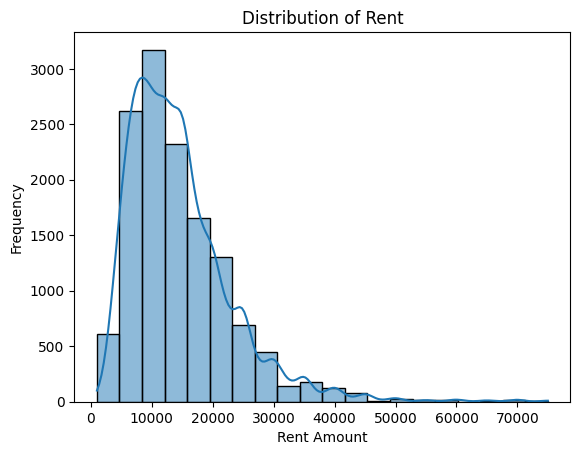

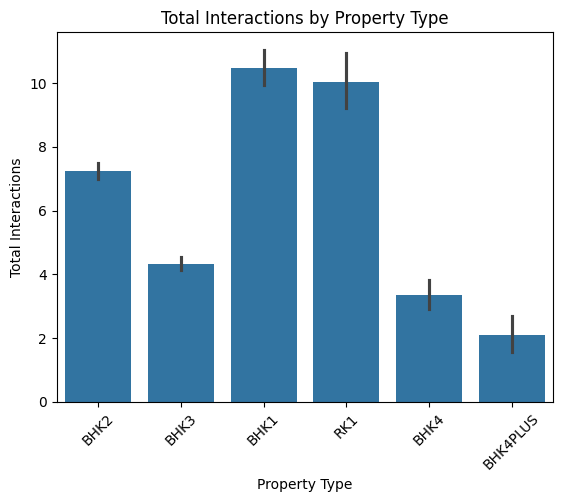

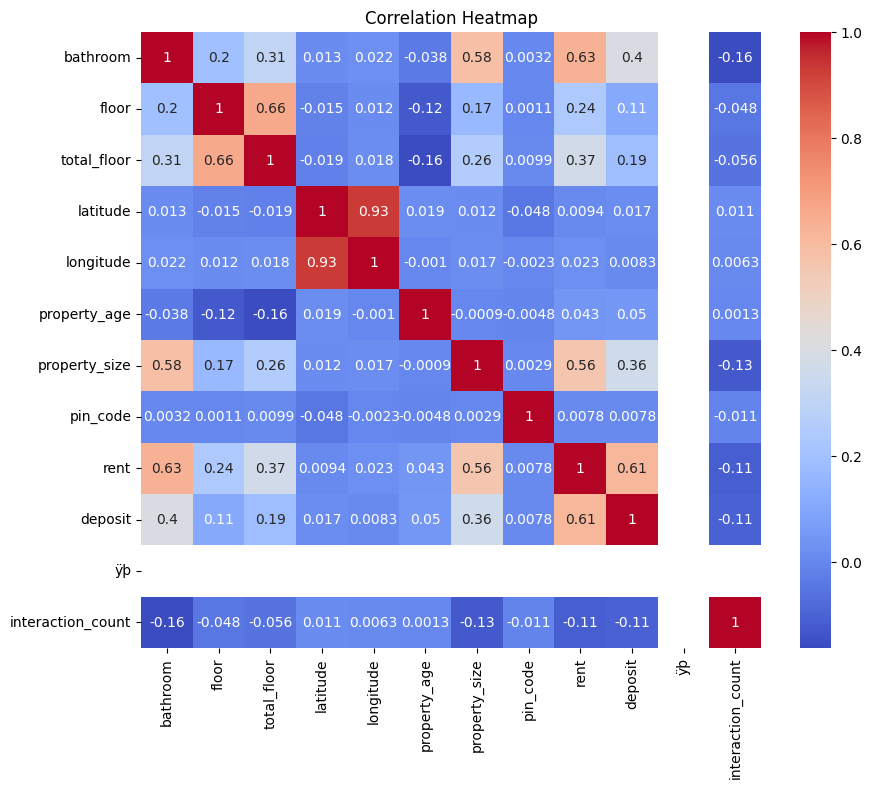

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming final_data has already been loaded (if not, load it)
final_data = pd.read_csv("final_property_data.csv")

# Load property_interactions data (assuming it's available)
property_interactions = pd.read_csv("property_interactions.csv")

# Step 1: Calculate interaction_count by counting the number of interactions for each property
interaction_count_df = property_interactions.groupby('property_id').size().reset_index(name='interaction_count')

# Step 2: Merge this interaction count with the final_data DataFrame
final_data = pd.merge(final_data, interaction_count_df, on='property_id', how='left')

# 1. Distribution of Rent (corrected 'photo_count' to 'rent' for the plot)
sns.histplot(final_data['rent'], bins=20, kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent Amount')
plt.ylabel('Frequency')
plt.show()

# 2. Total interactions by property type (ensure 'type' and 'interaction_count' are correct columns)
sns.barplot(x='type', y='interaction_count', data=final_data)
plt.title('Total Interactions by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Total Interactions')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# 3. Correlation heatmap
# Ensure the dataset has numeric columns to compute the correlation
numeric_columns = final_data.select_dtypes(include=['number']).columns

plt.figure(figsize=(10, 8))
sns.heatmap(final_data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
